### Libreria

In [17]:
!pip install mne
import mne
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt


# Base de datos

In [5]:
# la base de datos se encuentra en el siguiente enlace de drive:
# https://drive.google.com/drive/u/1/folders/1x3bnrOcUup5gxhdEC7w0chnzm1CB3q_5

# Para el análisis de la base de datos en el paper de Nicolaou2017,
# aplicaron lo siguiente:
# tenemos un tiempo de 9.5 segundos en la escucha de un sonido musical y ruido, 
# y una grabación de resting-state de duración de 5 min que consta de 300 segundos.

# en pre-proceso se realiza:
# 1- z-score.
# 2- para resting se particiona el eeg en trials de 9.5 seg sin overlaping.

# Pre-proceso usado es:
# filtrado de banda de 0.5-50 Hz.
# Aplicación de CAR referencia promedio común.
# Nota: luego de realizar pruebas con las fuentes de las componentes ICA y la 
# entropia se encontro que los sujetos 1 y 2 presentan porblema con el canal O2.

In [6]:
# acierto de los sujetos-con metodo de J(csp + lasso en bandas de interes), 
# con preproceso de filtrado de 0.5-50 Hz y CAR.
acc = [95.00,93.30,93.30,100.00,100.00,88.30,100.00,93.30,73.30,100.00,100.00,
       66.70,100.00,95.00,83.30,93.30,88.30,58.30,95.00,100.00,95.00]

# Sujetos a trabajar que funcionen
# sujeto bueno 7 0 11
# sujeto malo 18 o 12 

## *Music*

In [12]:
## music data
# lista de los sujetos.
Subjects = list(np.arange(1,22))
# canales de la base de datos
channels = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T3','C3','Cz','C4','T4',
            'T5','P3','Pz','P4','T6','O1','O2']
n_channels    = len(channels)
sampling_freq = 1000 # Frecuencia de muestreo de la base de datos.
# path ubicación de la base de datos
load_path= '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Auditory_processing/'
y        = list() # variable que contiene las etiquetas de los tiempo.
data_ref = list() # Variable para almacenar los datos delos sujetos en una lista.
# ciclo de los sujetos
for s in Subjects:
  S_ERP = loadmat(load_path + f"P"+str(s)+"_BCMI_frontHN_2017.mat")
  print('sujeto: ', s)
  data = S_ERP['music'][0][0][0]
  # transponer para organizar en las dimensiones de: [trials x canales x tiempo]
  data = np.transpose(data, (2,1,0)) # datos organizados
  classes=np.array(S_ERP['music'][0][0][1])[0]
  con_classes = []
  # 50, 100, 150, 200 clases 1, 2, 3, 4
  print('clase: tempo 50,100,150 y 200 beats por minuto')
  data_target= data#[:,:n_channels,:]

  # Create some dummy metadata
  ch_names = channels # nombre de los canales.
  cla= np.asarray(classes)==50 # clase 1
  classes[cla] = 1 
  cla= np.asarray(classes)==100 # clase 2
  classes[cla] = 2
  cla= np.asarray(classes)==150 # clase 3
  classes[cla] = 3 
  cla= np.asarray(classes)==200 # clase 4
  classes[cla] = 4 
  y.append(list(classes)) # agrego a la lista las 

  # structure
  ch_types = ['eeg']*n_channels
  info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(0.5,50)
  
  # CAR common average reference
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  

sujeto:  1
clase: tempo 50,100,150 y 200 beats por minuto
Not setting metadata
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6601 samples (6.601 sec)



## *Noise*

In [13]:
## noise data
# lista de los sujetos.
Subjects = list(np.arange(1,22))
# canales de la base de datos
channels = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T3','C3','Cz','C4','T4',
            'T5','P3','Pz','P4','T6','O1','O2']
n_channels    = len(channels)
sampling_freq = 1000 # Frecuencia de muestreo de la base de datos.
# path ubicación de la base de datos
load_path= '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Auditory_processing/'
y        = list() # variable que contiene las etiquetas de los tiempo.
data_ref = list() # Variable para almacenar los datos delos sujetos en una lista.
# ciclo de los sujetos
for s in Subjects:
  S_ERP = loadmat(load_path + f"P"+str(s)+"_BCMI_frontHN_2017.mat")
  print('sujeto: ', s)
  data = S_ERP['noise'][0][0][0]
  # transponer para organizar en las dimensiones de: [trials x canales x tiempo]
  data = np.transpose(data, (2,1,0)) # datos organizados
  classes=np.array(S_ERP['noise'][0][0][1])[0]
  con_classes = []
  # 50, 100, 150, 200 clases 1, 2, 3, 4
  print('clase: tempo 50,100,150 y 200 beats por minuto')
  data_target= data#[:,:n_channels,:]

  # Create some dummy metadata
  ch_names = channels # nombre de los canales
  cla= np.asarray(classes)==50 # clase 1
  classes[cla] = 1 
  cla= np.asarray(classes)==100 # clase 2
  classes[cla] = 2
  cla= np.asarray(classes)==150 # clase 3
  classes[cla] = 3 
  cla= np.asarray(classes)==200 # clase 4
  classes[cla] = 4 
  y.append(list(classes))

  # structure
  ch_types = ['eeg']*n_channels
  info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(0.5,50)
  
  # CAR common average reference
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  

sujeto:  1
clase: tempo 50,100,150 y 200 beats por minuto
Not setting metadata
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6601 samples (6.601 sec)



## *Resting-state*

In [15]:
## resting data
# lista de los sujetos.
Subjects = list(np.arange(1,22))
# canales de la base de datos
channels = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T3','C3','Cz','C4','T4',
            'T5','P3','Pz','P4','T6','O1','O2']
n_channels    = len(channels)
sampling_freq = 1000 # Frecuencia de muestreo de la base de datos.
# path ubicación de la base de datos
load_path= '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Auditory_processing/'
y        = list() # variable que contiene las etiquetas de los tiempo.
data_ref_rest = list() # Variable para almacenar los datos delos sujetos en una lista.
# ciclo de los sujetos

for s in Subjects:
  S_ERP = loadmat(load_path + f"P"+str(s)+"_BCMI_frontHN_2017.mat")
  print('sujeto: ', s)
  data = S_ERP['base']
  data = np.transpose(data, (1,0)) # transponer en canales x tiempo
  data = data[:n_channels,10*sampling_freq:-10*sampling_freq]
  data_target = np.zeros((1,data.shape[0],data.shape[1]))
  data_target[0,:,:] = data

  # structure mne
  ch_types = ['eeg']*n_channels
  info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(0.5,50)
  
  # CAR common average reference
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref_rest.append(rereferenced_raw.get_data())

sujeto:  1
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6601 samples (6.601 sec)



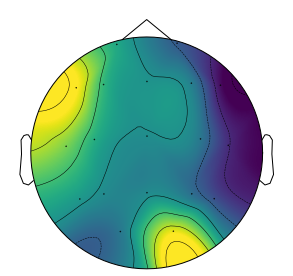

In [19]:
# topoplot
itr = 1
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,itr)
mne.viz.plot_topomap(rereferenced_raw.get_data()[0,:,0],
                      info, axes=ax, cmap='viridis', show=False, #sensors=True,
                      extrapolate='head', ch_type='eeg')
plt.show()